In [1]:
import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import scipy as sp
import faraway.utils

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20, 10)

In [2]:
df = pd.read_csv('Data/Carseats.csv', index_col=0)
print(df.shape)
df.head()

(400, 11)


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
X = df.drop(columns="Sales")
y = df["Sales"]

In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder

cat_vars = ["Urban", "US", "ShelveLoc"]

transform_pip = make_column_transformer(
   (OneHotEncoder(drop="first", handle_unknown="ignore"), cat_vars),
    remainder="passthrough"
)
pip = make_pipeline(
    transform_pip,
    DecisionTreeRegressor()
)
pip.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('onehotencoder',
                                    OneHotEncoder(drop='first',
                                                  handle_unknown='ignore'),
                                    ['Urban', 'US', 'ShelveLoc'])])),
  ('decisiontreeregressor', DecisionTreeRegressor())],
 'verbose': False,
 'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('onehotencoder',
                                  OneHotEncoder(drop='first',
                                                handle_unknown='ignore'),
                                  ['Urban', 'US', 'ShelveLoc'])]),
 'decisiontreeregressor': DecisionTreeRegressor(),
 'columntransformer__n_jobs': None,
 'columntransformer__remainder': 'passthrough',
 'columntransformer__sparse_threshold': 0.3,
 'columntransformer__transformer_weights': None,
 'columntransformer

### no regularization -- overfit
each bin will contain precisely one sample.

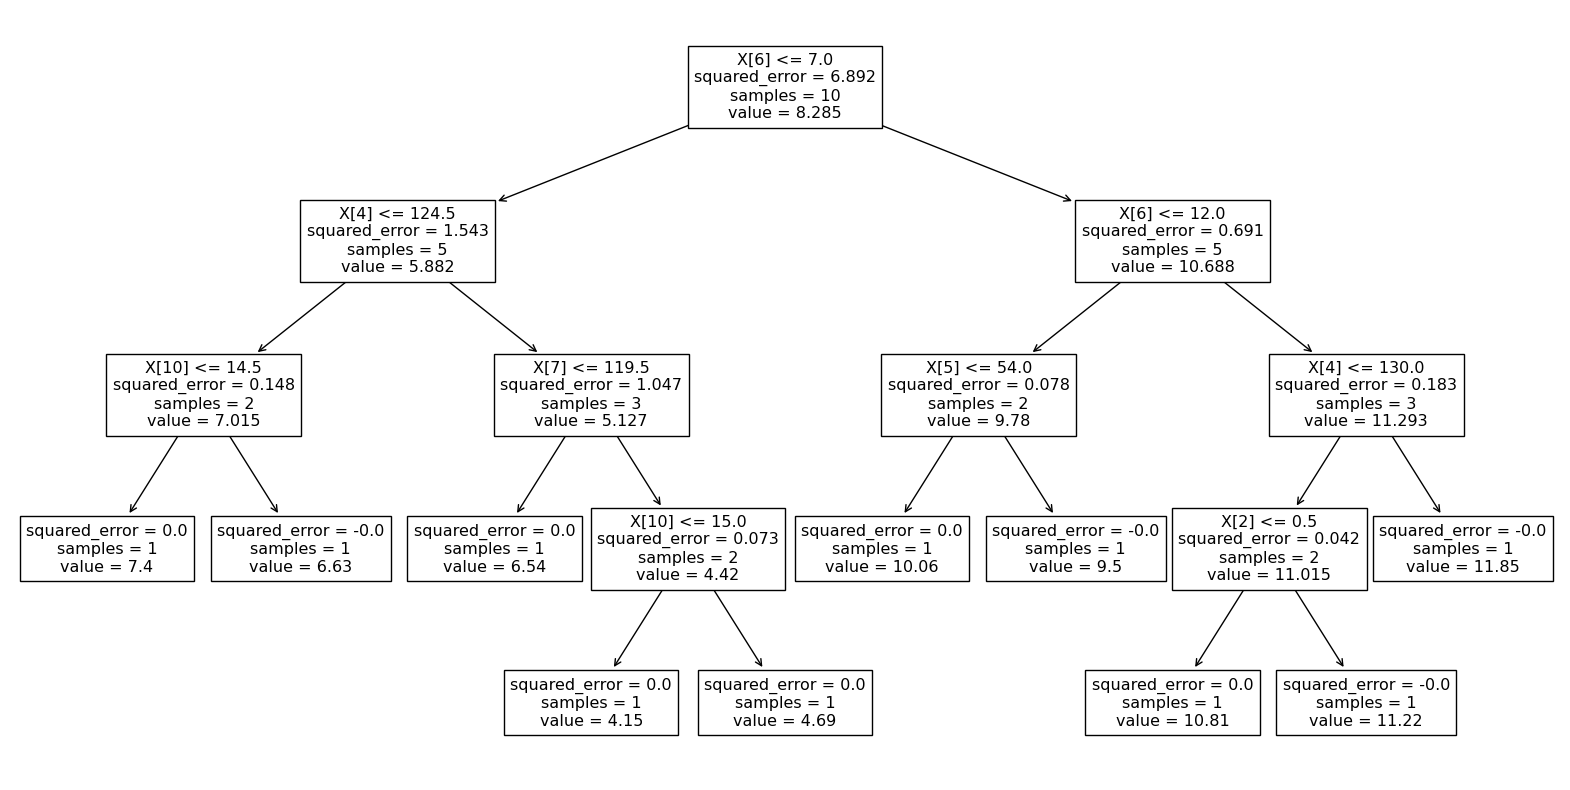

In [32]:
X_tr = transform_pip.fit_transform(X)
imb_tree = DecisionTreeRegressor().fit(X_tr[:10], y[:10])
_ = plot_tree(imb_tree)

## Two different approaches to parameterizing

In [40]:
from sklearn.model_selection import GridSearchCV
grid_params = {
    'decisiontreeregressor__ccp_alpha': np.linspace(0, 5, num=1000),
}
gs = GridSearchCV(pip, grid_params, scoring='r2', cv=10).fit(X, y)

In [41]:
gs.best_params_, gs.best_score_, gs.score(X, y)

({'decisiontreeregressor__ccp_alpha': 0.035035035035035036},
 0.42849061662247667,
 0.8216703453961189)

DecTree interpr

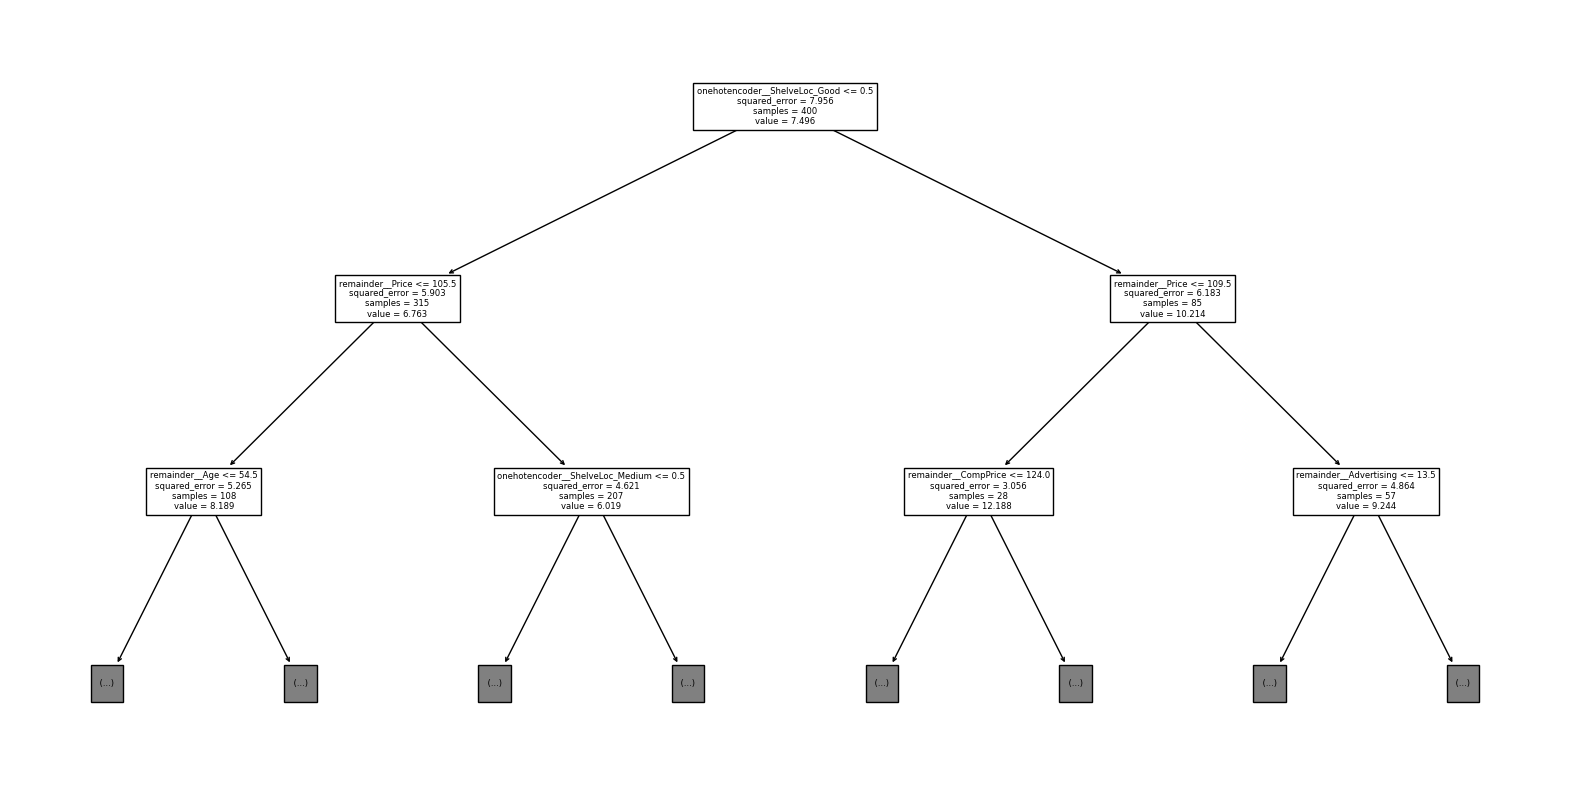

In [42]:
from sklearn.tree import plot_tree
best_tree = gs.best_estimator_[1]

_ = plot_tree(
    best_tree, 
    feature_names=transform_pip.fit(X).get_feature_names_out(),
    max_depth=2
)

In [11]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

grid_params2 = {
    'decisiontreeregressor__max_depth': np.arange(5, 15),
    'decisiontreeregressor__min_samples_leaf': [1, 5, 8, 10, 12, 15],
    'decisiontreeregressor__min_samples_split': [2, 3, 5, 8],
}

gs2 = GridSearchCV(
    pip, grid_params2, 
    scoring='r2', cv=10,
    verbose=2
).fit(X, y)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits
[CV] END decisiontreeregressor__max_depth=5, decisiontreeregressor__min_samples_leaf=1, decisiontreeregressor__min_samples_split=2; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=5, decisiontreeregressor__min_samples_leaf=1, decisiontreeregressor__min_samples_split=2; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=5, decisiontreeregressor__min_samples_leaf=1, decisiontreeregressor__min_samples_split=2; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=5, decisiontreeregressor__min_samples_leaf=1, decisiontreeregressor__min_samples_split=2; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=5, decisiontreeregressor__min_samples_leaf=1, decisiontreeregressor__min_samples_split=2; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=5, decisiontreeregressor__min_samples_leaf=1, decisiontreeregressor__min_samples_split=2; total time=   0.0s
[CV] END decisiontreeregresso

[CV] END decisiontreeregressor__max_depth=5, decisiontreeregressor__min_samples_leaf=5, decisiontreeregressor__min_samples_split=8; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=5, decisiontreeregressor__min_samples_leaf=5, decisiontreeregressor__min_samples_split=8; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=5, decisiontreeregressor__min_samples_leaf=5, decisiontreeregressor__min_samples_split=8; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=5, decisiontreeregressor__min_samples_leaf=5, decisiontreeregressor__min_samples_split=8; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=5, decisiontreeregressor__min_samples_leaf=5, decisiontreeregressor__min_samples_split=8; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=5, decisiontreeregressor__min_samples_leaf=5, decisiontreeregressor__min_samples_split=8; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=5, decisiontreeregressor__min_samples_leaf=5, decisi

[CV] END decisiontreeregressor__max_depth=5, decisiontreeregressor__min_samples_leaf=10, decisiontreeregressor__min_samples_split=5; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=5, decisiontreeregressor__min_samples_leaf=10, decisiontreeregressor__min_samples_split=5; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=5, decisiontreeregressor__min_samples_leaf=10, decisiontreeregressor__min_samples_split=5; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=5, decisiontreeregressor__min_samples_leaf=10, decisiontreeregressor__min_samples_split=5; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=5, decisiontreeregressor__min_samples_leaf=10, decisiontreeregressor__min_samples_split=8; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=5, decisiontreeregressor__min_samples_leaf=10, decisiontreeregressor__min_samples_split=8; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=5, decisiontreeregressor__min_samples_leaf=10,

[CV] END decisiontreeregressor__max_depth=5, decisiontreeregressor__min_samples_leaf=15, decisiontreeregressor__min_samples_split=3; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=5, decisiontreeregressor__min_samples_leaf=15, decisiontreeregressor__min_samples_split=3; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=5, decisiontreeregressor__min_samples_leaf=15, decisiontreeregressor__min_samples_split=3; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=5, decisiontreeregressor__min_samples_leaf=15, decisiontreeregressor__min_samples_split=3; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=5, decisiontreeregressor__min_samples_leaf=15, decisiontreeregressor__min_samples_split=3; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=5, decisiontreeregressor__min_samples_leaf=15, decisiontreeregressor__min_samples_split=3; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=5, decisiontreeregressor__min_samples_leaf=15,

[CV] END decisiontreeregressor__max_depth=6, decisiontreeregressor__min_samples_leaf=5, decisiontreeregressor__min_samples_split=3; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=6, decisiontreeregressor__min_samples_leaf=5, decisiontreeregressor__min_samples_split=3; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=6, decisiontreeregressor__min_samples_leaf=5, decisiontreeregressor__min_samples_split=3; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=6, decisiontreeregressor__min_samples_leaf=5, decisiontreeregressor__min_samples_split=3; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=6, decisiontreeregressor__min_samples_leaf=5, decisiontreeregressor__min_samples_split=3; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=6, decisiontreeregressor__min_samples_leaf=5, decisiontreeregressor__min_samples_split=3; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=6, decisiontreeregressor__min_samples_leaf=5, decisi

[CV] END decisiontreeregressor__max_depth=6, decisiontreeregressor__min_samples_leaf=10, decisiontreeregressor__min_samples_split=2; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=6, decisiontreeregressor__min_samples_leaf=10, decisiontreeregressor__min_samples_split=2; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=6, decisiontreeregressor__min_samples_leaf=10, decisiontreeregressor__min_samples_split=2; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=6, decisiontreeregressor__min_samples_leaf=10, decisiontreeregressor__min_samples_split=2; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=6, decisiontreeregressor__min_samples_leaf=10, decisiontreeregressor__min_samples_split=2; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=6, decisiontreeregressor__min_samples_leaf=10, decisiontreeregressor__min_samples_split=2; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=6, decisiontreeregressor__min_samples_leaf=10,

[CV] END decisiontreeregressor__max_depth=6, decisiontreeregressor__min_samples_leaf=12, decisiontreeregressor__min_samples_split=8; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=6, decisiontreeregressor__min_samples_leaf=12, decisiontreeregressor__min_samples_split=8; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=6, decisiontreeregressor__min_samples_leaf=12, decisiontreeregressor__min_samples_split=8; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=6, decisiontreeregressor__min_samples_leaf=12, decisiontreeregressor__min_samples_split=8; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=6, decisiontreeregressor__min_samples_leaf=15, decisiontreeregressor__min_samples_split=2; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=6, decisiontreeregressor__min_samples_leaf=15, decisiontreeregressor__min_samples_split=2; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=6, decisiontreeregressor__min_samples_leaf=15,

[CV] END decisiontreeregressor__max_depth=7, decisiontreeregressor__min_samples_leaf=1, decisiontreeregressor__min_samples_split=8; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=7, decisiontreeregressor__min_samples_leaf=1, decisiontreeregressor__min_samples_split=8; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=7, decisiontreeregressor__min_samples_leaf=1, decisiontreeregressor__min_samples_split=8; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=7, decisiontreeregressor__min_samples_leaf=1, decisiontreeregressor__min_samples_split=8; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=7, decisiontreeregressor__min_samples_leaf=1, decisiontreeregressor__min_samples_split=8; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=7, decisiontreeregressor__min_samples_leaf=1, decisiontreeregressor__min_samples_split=8; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=7, decisiontreeregressor__min_samples_leaf=5, decisi

[CV] END decisiontreeregressor__max_depth=7, decisiontreeregressor__min_samples_leaf=8, decisiontreeregressor__min_samples_split=5; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=7, decisiontreeregressor__min_samples_leaf=8, decisiontreeregressor__min_samples_split=8; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=7, decisiontreeregressor__min_samples_leaf=8, decisiontreeregressor__min_samples_split=8; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=7, decisiontreeregressor__min_samples_leaf=8, decisiontreeregressor__min_samples_split=8; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=7, decisiontreeregressor__min_samples_leaf=8, decisiontreeregressor__min_samples_split=8; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=7, decisiontreeregressor__min_samples_leaf=8, decisiontreeregressor__min_samples_split=8; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=7, decisiontreeregressor__min_samples_leaf=8, decisi

[CV] END decisiontreeregressor__max_depth=7, decisiontreeregressor__min_samples_leaf=12, decisiontreeregressor__min_samples_split=5; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=7, decisiontreeregressor__min_samples_leaf=12, decisiontreeregressor__min_samples_split=5; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=7, decisiontreeregressor__min_samples_leaf=12, decisiontreeregressor__min_samples_split=5; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=7, decisiontreeregressor__min_samples_leaf=12, decisiontreeregressor__min_samples_split=5; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=7, decisiontreeregressor__min_samples_leaf=12, decisiontreeregressor__min_samples_split=5; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=7, decisiontreeregressor__min_samples_leaf=12, decisiontreeregressor__min_samples_split=5; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=7, decisiontreeregressor__min_samples_leaf=12,

[CV] END decisiontreeregressor__max_depth=8, decisiontreeregressor__min_samples_leaf=1, decisiontreeregressor__min_samples_split=5; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=8, decisiontreeregressor__min_samples_leaf=1, decisiontreeregressor__min_samples_split=5; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=8, decisiontreeregressor__min_samples_leaf=1, decisiontreeregressor__min_samples_split=5; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=8, decisiontreeregressor__min_samples_leaf=1, decisiontreeregressor__min_samples_split=5; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=8, decisiontreeregressor__min_samples_leaf=1, decisiontreeregressor__min_samples_split=5; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=8, decisiontreeregressor__min_samples_leaf=1, decisiontreeregressor__min_samples_split=5; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=8, decisiontreeregressor__min_samples_leaf=1, decisi

[CV] END decisiontreeregressor__max_depth=8, decisiontreeregressor__min_samples_leaf=8, decisiontreeregressor__min_samples_split=3; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=8, decisiontreeregressor__min_samples_leaf=8, decisiontreeregressor__min_samples_split=3; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=8, decisiontreeregressor__min_samples_leaf=8, decisiontreeregressor__min_samples_split=3; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=8, decisiontreeregressor__min_samples_leaf=8, decisiontreeregressor__min_samples_split=3; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=8, decisiontreeregressor__min_samples_leaf=8, decisiontreeregressor__min_samples_split=3; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=8, decisiontreeregressor__min_samples_leaf=8, decisiontreeregressor__min_samples_split=3; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=8, decisiontreeregressor__min_samples_leaf=8, decisi

[CV] END decisiontreeregressor__max_depth=8, decisiontreeregressor__min_samples_leaf=12, decisiontreeregressor__min_samples_split=2; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=8, decisiontreeregressor__min_samples_leaf=12, decisiontreeregressor__min_samples_split=2; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=8, decisiontreeregressor__min_samples_leaf=12, decisiontreeregressor__min_samples_split=2; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=8, decisiontreeregressor__min_samples_leaf=12, decisiontreeregressor__min_samples_split=2; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=8, decisiontreeregressor__min_samples_leaf=12, decisiontreeregressor__min_samples_split=2; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=8, decisiontreeregressor__min_samples_leaf=12, decisiontreeregressor__min_samples_split=2; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=8, decisiontreeregressor__min_samples_leaf=12,

[CV] END decisiontreeregressor__max_depth=8, decisiontreeregressor__min_samples_leaf=15, decisiontreeregressor__min_samples_split=8; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=9, decisiontreeregressor__min_samples_leaf=1, decisiontreeregressor__min_samples_split=2; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=9, decisiontreeregressor__min_samples_leaf=1, decisiontreeregressor__min_samples_split=2; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=9, decisiontreeregressor__min_samples_leaf=1, decisiontreeregressor__min_samples_split=2; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=9, decisiontreeregressor__min_samples_leaf=1, decisiontreeregressor__min_samples_split=2; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=9, decisiontreeregressor__min_samples_leaf=1, decisiontreeregressor__min_samples_split=2; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=9, decisiontreeregressor__min_samples_leaf=1, decis

[CV] END decisiontreeregressor__max_depth=9, decisiontreeregressor__min_samples_leaf=5, decisiontreeregressor__min_samples_split=5; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=9, decisiontreeregressor__min_samples_leaf=5, decisiontreeregressor__min_samples_split=5; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=9, decisiontreeregressor__min_samples_leaf=5, decisiontreeregressor__min_samples_split=5; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=9, decisiontreeregressor__min_samples_leaf=5, decisiontreeregressor__min_samples_split=5; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=9, decisiontreeregressor__min_samples_leaf=5, decisiontreeregressor__min_samples_split=5; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=9, decisiontreeregressor__min_samples_leaf=5, decisiontreeregressor__min_samples_split=5; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=9, decisiontreeregressor__min_samples_leaf=5, decisi

[CV] END decisiontreeregressor__max_depth=9, decisiontreeregressor__min_samples_leaf=10, decisiontreeregressor__min_samples_split=3; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=9, decisiontreeregressor__min_samples_leaf=10, decisiontreeregressor__min_samples_split=3; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=9, decisiontreeregressor__min_samples_leaf=10, decisiontreeregressor__min_samples_split=3; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=9, decisiontreeregressor__min_samples_leaf=10, decisiontreeregressor__min_samples_split=5; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=9, decisiontreeregressor__min_samples_leaf=10, decisiontreeregressor__min_samples_split=5; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=9, decisiontreeregressor__min_samples_leaf=10, decisiontreeregressor__min_samples_split=5; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=9, decisiontreeregressor__min_samples_leaf=10,

[CV] END decisiontreeregressor__max_depth=9, decisiontreeregressor__min_samples_leaf=15, decisiontreeregressor__min_samples_split=3; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=9, decisiontreeregressor__min_samples_leaf=15, decisiontreeregressor__min_samples_split=3; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=9, decisiontreeregressor__min_samples_leaf=15, decisiontreeregressor__min_samples_split=3; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=9, decisiontreeregressor__min_samples_leaf=15, decisiontreeregressor__min_samples_split=3; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=9, decisiontreeregressor__min_samples_leaf=15, decisiontreeregressor__min_samples_split=3; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=9, decisiontreeregressor__min_samples_leaf=15, decisiontreeregressor__min_samples_split=3; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=9, decisiontreeregressor__min_samples_leaf=15,

[CV] END decisiontreeregressor__max_depth=10, decisiontreeregressor__min_samples_leaf=1, decisiontreeregressor__min_samples_split=8; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=10, decisiontreeregressor__min_samples_leaf=5, decisiontreeregressor__min_samples_split=2; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=10, decisiontreeregressor__min_samples_leaf=5, decisiontreeregressor__min_samples_split=2; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=10, decisiontreeregressor__min_samples_leaf=5, decisiontreeregressor__min_samples_split=2; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=10, decisiontreeregressor__min_samples_leaf=5, decisiontreeregressor__min_samples_split=2; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=10, decisiontreeregressor__min_samples_leaf=5, decisiontreeregressor__min_samples_split=2; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=10, decisiontreeregressor__min_samples_leaf=5,

[CV] END decisiontreeregressor__max_depth=10, decisiontreeregressor__min_samples_leaf=8, decisiontreeregressor__min_samples_split=5; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=10, decisiontreeregressor__min_samples_leaf=8, decisiontreeregressor__min_samples_split=8; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=10, decisiontreeregressor__min_samples_leaf=8, decisiontreeregressor__min_samples_split=8; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=10, decisiontreeregressor__min_samples_leaf=8, decisiontreeregressor__min_samples_split=8; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=10, decisiontreeregressor__min_samples_leaf=8, decisiontreeregressor__min_samples_split=8; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=10, decisiontreeregressor__min_samples_leaf=8, decisiontreeregressor__min_samples_split=8; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=10, decisiontreeregressor__min_samples_leaf=8,

[CV] END decisiontreeregressor__max_depth=10, decisiontreeregressor__min_samples_leaf=12, decisiontreeregressor__min_samples_split=5; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=10, decisiontreeregressor__min_samples_leaf=12, decisiontreeregressor__min_samples_split=5; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=10, decisiontreeregressor__min_samples_leaf=12, decisiontreeregressor__min_samples_split=5; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=10, decisiontreeregressor__min_samples_leaf=12, decisiontreeregressor__min_samples_split=5; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=10, decisiontreeregressor__min_samples_leaf=12, decisiontreeregressor__min_samples_split=5; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=10, decisiontreeregressor__min_samples_leaf=12, decisiontreeregressor__min_samples_split=5; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=10, decisiontreeregressor__min_samples_l

[CV] END decisiontreeregressor__max_depth=11, decisiontreeregressor__min_samples_leaf=1, decisiontreeregressor__min_samples_split=2; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=11, decisiontreeregressor__min_samples_leaf=1, decisiontreeregressor__min_samples_split=2; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=11, decisiontreeregressor__min_samples_leaf=1, decisiontreeregressor__min_samples_split=2; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=11, decisiontreeregressor__min_samples_leaf=1, decisiontreeregressor__min_samples_split=2; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=11, decisiontreeregressor__min_samples_leaf=1, decisiontreeregressor__min_samples_split=3; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=11, decisiontreeregressor__min_samples_leaf=1, decisiontreeregressor__min_samples_split=3; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=11, decisiontreeregressor__min_samples_leaf=1,

[CV] END decisiontreeregressor__max_depth=11, decisiontreeregressor__min_samples_leaf=5, decisiontreeregressor__min_samples_split=5; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=11, decisiontreeregressor__min_samples_leaf=5, decisiontreeregressor__min_samples_split=5; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=11, decisiontreeregressor__min_samples_leaf=5, decisiontreeregressor__min_samples_split=5; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=11, decisiontreeregressor__min_samples_leaf=5, decisiontreeregressor__min_samples_split=5; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=11, decisiontreeregressor__min_samples_leaf=5, decisiontreeregressor__min_samples_split=5; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=11, decisiontreeregressor__min_samples_leaf=5, decisiontreeregressor__min_samples_split=5; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=11, decisiontreeregressor__min_samples_leaf=5,

[CV] END decisiontreeregressor__max_depth=11, decisiontreeregressor__min_samples_leaf=10, decisiontreeregressor__min_samples_split=3; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=11, decisiontreeregressor__min_samples_leaf=10, decisiontreeregressor__min_samples_split=3; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=11, decisiontreeregressor__min_samples_leaf=10, decisiontreeregressor__min_samples_split=3; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=11, decisiontreeregressor__min_samples_leaf=10, decisiontreeregressor__min_samples_split=3; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=11, decisiontreeregressor__min_samples_leaf=10, decisiontreeregressor__min_samples_split=3; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=11, decisiontreeregressor__min_samples_leaf=10, decisiontreeregressor__min_samples_split=3; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=11, decisiontreeregressor__min_samples_l

[CV] END decisiontreeregressor__max_depth=11, decisiontreeregressor__min_samples_leaf=15, decisiontreeregressor__min_samples_split=2; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=11, decisiontreeregressor__min_samples_leaf=15, decisiontreeregressor__min_samples_split=2; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=11, decisiontreeregressor__min_samples_leaf=15, decisiontreeregressor__min_samples_split=2; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=11, decisiontreeregressor__min_samples_leaf=15, decisiontreeregressor__min_samples_split=2; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=11, decisiontreeregressor__min_samples_leaf=15, decisiontreeregressor__min_samples_split=3; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=11, decisiontreeregressor__min_samples_leaf=15, decisiontreeregressor__min_samples_split=3; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=11, decisiontreeregressor__min_samples_l

[CV] END decisiontreeregressor__max_depth=12, decisiontreeregressor__min_samples_leaf=1, decisiontreeregressor__min_samples_split=8; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=12, decisiontreeregressor__min_samples_leaf=1, decisiontreeregressor__min_samples_split=8; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=12, decisiontreeregressor__min_samples_leaf=1, decisiontreeregressor__min_samples_split=8; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=12, decisiontreeregressor__min_samples_leaf=1, decisiontreeregressor__min_samples_split=8; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=12, decisiontreeregressor__min_samples_leaf=1, decisiontreeregressor__min_samples_split=8; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=12, decisiontreeregressor__min_samples_leaf=1, decisiontreeregressor__min_samples_split=8; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=12, decisiontreeregressor__min_samples_leaf=5,

[CV] END decisiontreeregressor__max_depth=12, decisiontreeregressor__min_samples_leaf=8, decisiontreeregressor__min_samples_split=5; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=12, decisiontreeregressor__min_samples_leaf=8, decisiontreeregressor__min_samples_split=5; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=12, decisiontreeregressor__min_samples_leaf=8, decisiontreeregressor__min_samples_split=5; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=12, decisiontreeregressor__min_samples_leaf=8, decisiontreeregressor__min_samples_split=8; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=12, decisiontreeregressor__min_samples_leaf=8, decisiontreeregressor__min_samples_split=8; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=12, decisiontreeregressor__min_samples_leaf=8, decisiontreeregressor__min_samples_split=8; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=12, decisiontreeregressor__min_samples_leaf=8,

[CV] END decisiontreeregressor__max_depth=12, decisiontreeregressor__min_samples_leaf=12, decisiontreeregressor__min_samples_split=3; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=12, decisiontreeregressor__min_samples_leaf=12, decisiontreeregressor__min_samples_split=3; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=12, decisiontreeregressor__min_samples_leaf=12, decisiontreeregressor__min_samples_split=3; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=12, decisiontreeregressor__min_samples_leaf=12, decisiontreeregressor__min_samples_split=5; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=12, decisiontreeregressor__min_samples_leaf=12, decisiontreeregressor__min_samples_split=5; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=12, decisiontreeregressor__min_samples_leaf=12, decisiontreeregressor__min_samples_split=5; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=12, decisiontreeregressor__min_samples_l

[CV] END decisiontreeregressor__max_depth=13, decisiontreeregressor__min_samples_leaf=1, decisiontreeregressor__min_samples_split=2; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=13, decisiontreeregressor__min_samples_leaf=1, decisiontreeregressor__min_samples_split=3; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=13, decisiontreeregressor__min_samples_leaf=1, decisiontreeregressor__min_samples_split=3; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=13, decisiontreeregressor__min_samples_leaf=1, decisiontreeregressor__min_samples_split=3; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=13, decisiontreeregressor__min_samples_leaf=1, decisiontreeregressor__min_samples_split=3; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=13, decisiontreeregressor__min_samples_leaf=1, decisiontreeregressor__min_samples_split=3; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=13, decisiontreeregressor__min_samples_leaf=1,

[CV] END decisiontreeregressor__max_depth=13, decisiontreeregressor__min_samples_leaf=5, decisiontreeregressor__min_samples_split=8; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=13, decisiontreeregressor__min_samples_leaf=5, decisiontreeregressor__min_samples_split=8; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=13, decisiontreeregressor__min_samples_leaf=5, decisiontreeregressor__min_samples_split=8; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=13, decisiontreeregressor__min_samples_leaf=8, decisiontreeregressor__min_samples_split=2; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=13, decisiontreeregressor__min_samples_leaf=8, decisiontreeregressor__min_samples_split=2; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=13, decisiontreeregressor__min_samples_leaf=8, decisiontreeregressor__min_samples_split=2; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=13, decisiontreeregressor__min_samples_leaf=8,

[CV] END decisiontreeregressor__max_depth=13, decisiontreeregressor__min_samples_leaf=10, decisiontreeregressor__min_samples_split=5; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=13, decisiontreeregressor__min_samples_leaf=10, decisiontreeregressor__min_samples_split=5; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=13, decisiontreeregressor__min_samples_leaf=10, decisiontreeregressor__min_samples_split=5; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=13, decisiontreeregressor__min_samples_leaf=10, decisiontreeregressor__min_samples_split=5; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=13, decisiontreeregressor__min_samples_leaf=10, decisiontreeregressor__min_samples_split=5; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=13, decisiontreeregressor__min_samples_leaf=10, decisiontreeregressor__min_samples_split=5; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=13, decisiontreeregressor__min_samples_l

[CV] END decisiontreeregressor__max_depth=13, decisiontreeregressor__min_samples_leaf=15, decisiontreeregressor__min_samples_split=3; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=13, decisiontreeregressor__min_samples_leaf=15, decisiontreeregressor__min_samples_split=3; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=13, decisiontreeregressor__min_samples_leaf=15, decisiontreeregressor__min_samples_split=3; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=13, decisiontreeregressor__min_samples_leaf=15, decisiontreeregressor__min_samples_split=3; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=13, decisiontreeregressor__min_samples_leaf=15, decisiontreeregressor__min_samples_split=3; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=13, decisiontreeregressor__min_samples_leaf=15, decisiontreeregressor__min_samples_split=3; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=13, decisiontreeregressor__min_samples_l

[CV] END decisiontreeregressor__max_depth=14, decisiontreeregressor__min_samples_leaf=5, decisiontreeregressor__min_samples_split=2; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=14, decisiontreeregressor__min_samples_leaf=5, decisiontreeregressor__min_samples_split=2; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=14, decisiontreeregressor__min_samples_leaf=5, decisiontreeregressor__min_samples_split=2; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=14, decisiontreeregressor__min_samples_leaf=5, decisiontreeregressor__min_samples_split=2; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=14, decisiontreeregressor__min_samples_leaf=5, decisiontreeregressor__min_samples_split=2; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=14, decisiontreeregressor__min_samples_leaf=5, decisiontreeregressor__min_samples_split=3; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=14, decisiontreeregressor__min_samples_leaf=5,

[CV] END decisiontreeregressor__max_depth=14, decisiontreeregressor__min_samples_leaf=8, decisiontreeregressor__min_samples_split=8; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=14, decisiontreeregressor__min_samples_leaf=8, decisiontreeregressor__min_samples_split=8; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=14, decisiontreeregressor__min_samples_leaf=8, decisiontreeregressor__min_samples_split=8; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=14, decisiontreeregressor__min_samples_leaf=10, decisiontreeregressor__min_samples_split=2; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=14, decisiontreeregressor__min_samples_leaf=10, decisiontreeregressor__min_samples_split=2; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=14, decisiontreeregressor__min_samples_leaf=10, decisiontreeregressor__min_samples_split=2; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=14, decisiontreeregressor__min_samples_leaf

[CV] END decisiontreeregressor__max_depth=14, decisiontreeregressor__min_samples_leaf=12, decisiontreeregressor__min_samples_split=8; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=14, decisiontreeregressor__min_samples_leaf=12, decisiontreeregressor__min_samples_split=8; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=14, decisiontreeregressor__min_samples_leaf=12, decisiontreeregressor__min_samples_split=8; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=14, decisiontreeregressor__min_samples_leaf=12, decisiontreeregressor__min_samples_split=8; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=14, decisiontreeregressor__min_samples_leaf=15, decisiontreeregressor__min_samples_split=2; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=14, decisiontreeregressor__min_samples_leaf=15, decisiontreeregressor__min_samples_split=2; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=14, decisiontreeregressor__min_samples_l

In [39]:
gs2.best_params_, gs2.best_score_, gs2.score(X, y)

({'decisiontreeregressor__max_depth': 9,
  'decisiontreeregressor__min_samples_leaf': 10,
  'decisiontreeregressor__min_samples_split': 3},
 0.4515548756766015,
 0.7244211716027282)

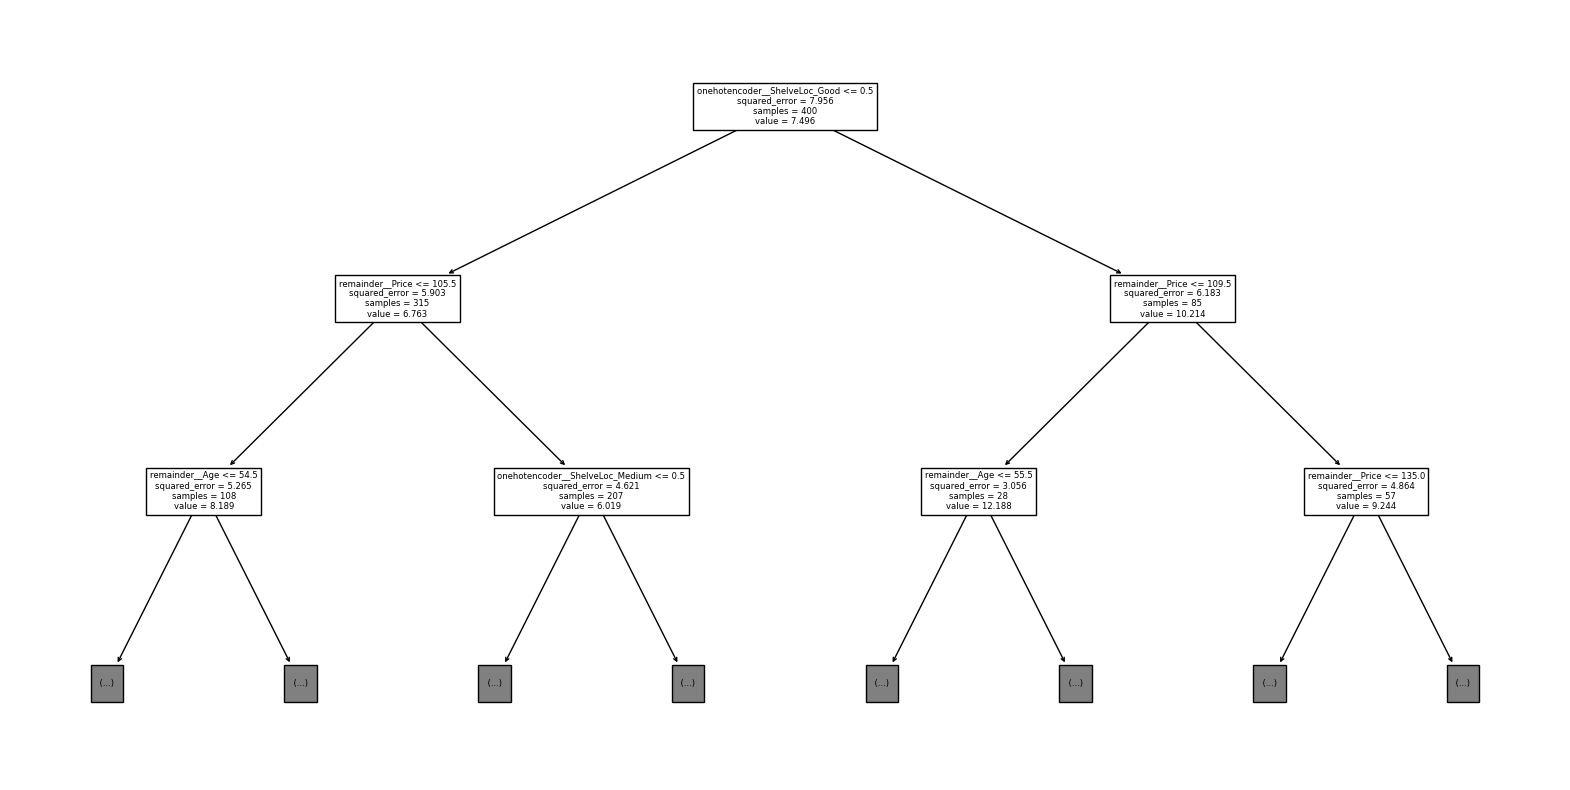

In [31]:
from sklearn.tree import export_text

best_tree2 = gs2.best_estimator_[1]

# print(
#     export_text(
#         best_tree2, 
#         feature_names=list(transform_pip.get_feature_names_out())
#     )
# )

_ = plot_tree(
    best_tree2, 
    feature_names=transform_pip.get_feature_names_out(), 
    max_depth=2
)

We have a couple of observations:
- We had an exhaustive search through the pruned trees, though still haven't manages to overscore the second search. Therefore, parameterizing the tree using the second set is, as expected, more flexible.
- On the other hand, searching through the space of three parameters is usually much more computationally complex

## Ensembling
We first use bagging; run into problem of correlated bagged trees, bcs clearly there are dominating features, and then see how `RandomForest` improves the result by dealing with the issue. </br>
We'll also compare cross-validated score to OOB score. We expect similar results.

In [52]:
from sklearn.ensemble import BaggingRegressor

bag_pip = make_pipeline(
    transform_pip, 
    BaggingRegressor(
        base_estimator=DecisionTreeRegressor(),
        oob_score=True,
        random_state=42
    )
)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Urban', 'US',
                                                   'ShelveLoc'])])),
                ('baggingregressor',
                 BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                                  oob_score=True, random_state=42))])

In [58]:
from sklearn.model_selection import cross_val_score
bag_score = cross_val_score(bag_pip, X, y, scoring='r2', cv=10)
bag_score.mean()

0.6388955129018602

In [59]:
bag_pip.fit(X, y)
bag_pip[1].oob_score_

0.6034011249827071

In [68]:
bag_pip.score(X, y)

0.9439599597966543

...The difference is caused by the fact that OOB score uses only a subset of trees on each particular bootstrapped sampled.
They are still quite similar

Regardless, the score is already much better.

## Improving with forest

In [60]:
from sklearn.ensemble import RandomForestRegressor

forest_pip = make_pipeline(transform_pip, RandomForestRegressor(oob_score=True))
forest_pip.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('onehotencoder',
                                    OneHotEncoder(drop='first',
                                                  handle_unknown='ignore'),
                                    ['Urban', 'US', 'ShelveLoc'])])),
  ('randomforestregressor', RandomForestRegressor())],
 'verbose': False,
 'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('onehotencoder',
                                  OneHotEncoder(drop='first',
                                                handle_unknown='ignore'),
                                  ['Urban', 'US', 'ShelveLoc'])]),
 'randomforestregressor': RandomForestRegressor(),
 'columntransformer__n_jobs': None,
 'columntransformer__remainder': 'passthrough',
 'columntransformer__sparse_threshold': 0.3,
 'columntransformer__transformer_weights': None,
 'columntransformer

In [83]:
from sklearn.model_selection import RandomizedSearchCV
forest_grid_params = {
    "randomforestregressor__n_estimators": [100, 250, 500],
    'randomforestregressor__max_features': ["sqrt", "log2", 0.3],
    # these are +- optional: we expect a single tree
    # to overfit
    'randomforestregressor__max_depth': [None],
    'randomforestregressor__min_samples_leaf': [1, 3, 5],
    'randomforestregressor__min_samples_split': [2, 3, 5],
}

forest_gs = GridSearchCV(
    forest_pip, forest_grid_params, 
#     n_iter=100,
    scoring='r2', cv=10,
    verbose=2, 
#     random_state=42,
).fit(X, y)

Fitting 10 folds for each of 81 candidates, totalling 810 fits
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=sqrt, randomforestregressor__min_samples_leaf=1, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=100; total time=   0.0s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=sqrt, randomforestregressor__min_samples_leaf=1, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=100; total time=   0.0s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=sqrt, randomforestregressor__min_samples_leaf=1, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=100; total time=   0.0s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=sqrt, randomforestregressor__min_samples_leaf=1, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=100; total ti

[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=sqrt, randomforestregressor__min_samples_leaf=1, randomforestregressor__min_samples_split=3, randomforestregressor__n_estimators=100; total time=   0.0s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=sqrt, randomforestregressor__min_samples_leaf=1, randomforestregressor__min_samples_split=3, randomforestregressor__n_estimators=100; total time=   0.0s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=sqrt, randomforestregressor__min_samples_leaf=1, randomforestregressor__min_samples_split=3, randomforestregressor__n_estimators=100; total time=   0.0s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=sqrt, randomforestregressor__min_samples_leaf=1, randomforestregressor__min_samples_split=3, randomforestregressor__n_estimators=100; total time=   0.0s
[CV] END randomforestregressor__max_depth=None, rand

[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=sqrt, randomforestregressor__min_samples_leaf=1, randomforestregressor__min_samples_split=5, randomforestregressor__n_estimators=250; total time=   0.2s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=sqrt, randomforestregressor__min_samples_leaf=1, randomforestregressor__min_samples_split=5, randomforestregressor__n_estimators=250; total time=   0.1s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=sqrt, randomforestregressor__min_samples_leaf=1, randomforestregressor__min_samples_split=5, randomforestregressor__n_estimators=250; total time=   0.1s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=sqrt, randomforestregressor__min_samples_leaf=1, randomforestregressor__min_samples_split=5, randomforestregressor__n_estimators=250; total time=   0.2s
[CV] END randomforestregressor__max_depth=None, rand

[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=sqrt, randomforestregressor__min_samples_leaf=3, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=250; total time=   0.2s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=sqrt, randomforestregressor__min_samples_leaf=3, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=250; total time=   0.1s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=sqrt, randomforestregressor__min_samples_leaf=3, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=250; total time=   0.1s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=sqrt, randomforestregressor__min_samples_leaf=3, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=250; total time=   0.1s
[CV] END randomforestregressor__max_depth=None, rand

[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=sqrt, randomforestregressor__min_samples_leaf=3, randomforestregressor__min_samples_split=3, randomforestregressor__n_estimators=500; total time=   0.4s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=sqrt, randomforestregressor__min_samples_leaf=3, randomforestregressor__min_samples_split=3, randomforestregressor__n_estimators=500; total time=   0.4s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=sqrt, randomforestregressor__min_samples_leaf=3, randomforestregressor__min_samples_split=3, randomforestregressor__n_estimators=500; total time=   0.4s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=sqrt, randomforestregressor__min_samples_leaf=3, randomforestregressor__min_samples_split=3, randomforestregressor__n_estimators=500; total time=   0.4s
[CV] END randomforestregressor__max_depth=None, rand

[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=sqrt, randomforestregressor__min_samples_leaf=3, randomforestregressor__min_samples_split=5, randomforestregressor__n_estimators=500; total time=   0.4s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=sqrt, randomforestregressor__min_samples_leaf=3, randomforestregressor__min_samples_split=5, randomforestregressor__n_estimators=500; total time=   0.4s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=sqrt, randomforestregressor__min_samples_leaf=3, randomforestregressor__min_samples_split=5, randomforestregressor__n_estimators=500; total time=   0.4s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=sqrt, randomforestregressor__min_samples_leaf=3, randomforestregressor__min_samples_split=5, randomforestregressor__n_estimators=500; total time=   0.4s
[CV] END randomforestregressor__max_depth=None, rand

[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=sqrt, randomforestregressor__min_samples_leaf=5, randomforestregressor__min_samples_split=3, randomforestregressor__n_estimators=100; total time=   0.0s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=sqrt, randomforestregressor__min_samples_leaf=5, randomforestregressor__min_samples_split=3, randomforestregressor__n_estimators=100; total time=   0.0s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=sqrt, randomforestregressor__min_samples_leaf=5, randomforestregressor__min_samples_split=3, randomforestregressor__n_estimators=100; total time=   0.0s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=sqrt, randomforestregressor__min_samples_leaf=5, randomforestregressor__min_samples_split=3, randomforestregressor__n_estimators=100; total time=   0.0s
[CV] END randomforestregressor__max_depth=None, rand

[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=sqrt, randomforestregressor__min_samples_leaf=5, randomforestregressor__min_samples_split=5, randomforestregressor__n_estimators=100; total time=   0.0s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=sqrt, randomforestregressor__min_samples_leaf=5, randomforestregressor__min_samples_split=5, randomforestregressor__n_estimators=100; total time=   0.0s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=sqrt, randomforestregressor__min_samples_leaf=5, randomforestregressor__min_samples_split=5, randomforestregressor__n_estimators=250; total time=   0.1s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=sqrt, randomforestregressor__min_samples_leaf=5, randomforestregressor__min_samples_split=5, randomforestregressor__n_estimators=250; total time=   0.1s
[CV] END randomforestregressor__max_depth=None, rand

[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=log2, randomforestregressor__min_samples_leaf=1, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=250; total time=   0.2s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=log2, randomforestregressor__min_samples_leaf=1, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=250; total time=   0.2s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=log2, randomforestregressor__min_samples_leaf=1, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=250; total time=   0.2s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=log2, randomforestregressor__min_samples_leaf=1, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=250; total time=   0.2s
[CV] END randomforestregressor__max_depth=None, rand

[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=log2, randomforestregressor__min_samples_leaf=1, randomforestregressor__min_samples_split=3, randomforestregressor__n_estimators=250; total time=   0.2s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=log2, randomforestregressor__min_samples_leaf=1, randomforestregressor__min_samples_split=3, randomforestregressor__n_estimators=250; total time=   0.2s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=log2, randomforestregressor__min_samples_leaf=1, randomforestregressor__min_samples_split=3, randomforestregressor__n_estimators=500; total time=   0.4s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=log2, randomforestregressor__min_samples_leaf=1, randomforestregressor__min_samples_split=3, randomforestregressor__n_estimators=500; total time=   0.5s
[CV] END randomforestregressor__max_depth=None, rand

[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=log2, randomforestregressor__min_samples_leaf=1, randomforestregressor__min_samples_split=5, randomforestregressor__n_estimators=500; total time=   0.4s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=log2, randomforestregressor__min_samples_leaf=1, randomforestregressor__min_samples_split=5, randomforestregressor__n_estimators=500; total time=   0.4s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=log2, randomforestregressor__min_samples_leaf=1, randomforestregressor__min_samples_split=5, randomforestregressor__n_estimators=500; total time=   0.4s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=log2, randomforestregressor__min_samples_leaf=1, randomforestregressor__min_samples_split=5, randomforestregressor__n_estimators=500; total time=   0.4s
[CV] END randomforestregressor__max_depth=None, rand

[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=log2, randomforestregressor__min_samples_leaf=3, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=500; total time=   0.4s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=log2, randomforestregressor__min_samples_leaf=3, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=500; total time=   0.4s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=log2, randomforestregressor__min_samples_leaf=3, randomforestregressor__min_samples_split=3, randomforestregressor__n_estimators=100; total time=   0.0s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=log2, randomforestregressor__min_samples_leaf=3, randomforestregressor__min_samples_split=3, randomforestregressor__n_estimators=100; total time=   0.0s
[CV] END randomforestregressor__max_depth=None, rand

[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=log2, randomforestregressor__min_samples_leaf=3, randomforestregressor__min_samples_split=5, randomforestregressor__n_estimators=100; total time=   0.0s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=log2, randomforestregressor__min_samples_leaf=3, randomforestregressor__min_samples_split=5, randomforestregressor__n_estimators=100; total time=   0.0s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=log2, randomforestregressor__min_samples_leaf=3, randomforestregressor__min_samples_split=5, randomforestregressor__n_estimators=100; total time=   0.0s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=log2, randomforestregressor__min_samples_leaf=3, randomforestregressor__min_samples_split=5, randomforestregressor__n_estimators=100; total time=   0.0s
[CV] END randomforestregressor__max_depth=None, rand

[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=log2, randomforestregressor__min_samples_leaf=5, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=250; total time=   0.1s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=log2, randomforestregressor__min_samples_leaf=5, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=250; total time=   0.1s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=log2, randomforestregressor__min_samples_leaf=5, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=250; total time=   0.1s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=log2, randomforestregressor__min_samples_leaf=5, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=250; total time=   0.1s
[CV] END randomforestregressor__max_depth=None, rand

[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=log2, randomforestregressor__min_samples_leaf=5, randomforestregressor__min_samples_split=3, randomforestregressor__n_estimators=250; total time=   0.1s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=log2, randomforestregressor__min_samples_leaf=5, randomforestregressor__min_samples_split=3, randomforestregressor__n_estimators=250; total time=   0.1s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=log2, randomforestregressor__min_samples_leaf=5, randomforestregressor__min_samples_split=3, randomforestregressor__n_estimators=250; total time=   0.1s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=log2, randomforestregressor__min_samples_leaf=5, randomforestregressor__min_samples_split=3, randomforestregressor__n_estimators=250; total time=   0.1s
[CV] END randomforestregressor__max_depth=None, rand

[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=log2, randomforestregressor__min_samples_leaf=5, randomforestregressor__min_samples_split=5, randomforestregressor__n_estimators=500; total time=   0.5s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=log2, randomforestregressor__min_samples_leaf=5, randomforestregressor__min_samples_split=5, randomforestregressor__n_estimators=500; total time=   0.4s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=log2, randomforestregressor__min_samples_leaf=5, randomforestregressor__min_samples_split=5, randomforestregressor__n_estimators=500; total time=   0.4s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=log2, randomforestregressor__min_samples_leaf=5, randomforestregressor__min_samples_split=5, randomforestregressor__n_estimators=500; total time=   0.4s
[CV] END randomforestregressor__max_depth=None, rand

[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=0.3, randomforestregressor__min_samples_leaf=1, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=500; total time=   0.4s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=0.3, randomforestregressor__min_samples_leaf=1, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=500; total time=   0.5s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=0.3, randomforestregressor__min_samples_leaf=1, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=500; total time=   0.5s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=0.3, randomforestregressor__min_samples_leaf=1, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=500; total time=   0.5s
[CV] END randomforestregressor__max_depth=None, randomfo

[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=0.3, randomforestregressor__min_samples_leaf=1, randomforestregressor__min_samples_split=5, randomforestregressor__n_estimators=100; total time=   0.0s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=0.3, randomforestregressor__min_samples_leaf=1, randomforestregressor__min_samples_split=5, randomforestregressor__n_estimators=100; total time=   0.0s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=0.3, randomforestregressor__min_samples_leaf=1, randomforestregressor__min_samples_split=5, randomforestregressor__n_estimators=100; total time=   0.0s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=0.3, randomforestregressor__min_samples_leaf=1, randomforestregressor__min_samples_split=5, randomforestregressor__n_estimators=100; total time=   0.0s
[CV] END randomforestregressor__max_depth=None, randomfo

[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=0.3, randomforestregressor__min_samples_leaf=3, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=100; total time=   0.0s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=0.3, randomforestregressor__min_samples_leaf=3, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=100; total time=   0.0s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=0.3, randomforestregressor__min_samples_leaf=3, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=250; total time=   0.1s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=0.3, randomforestregressor__min_samples_leaf=3, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=250; total time=   0.2s
[CV] END randomforestregressor__max_depth=None, randomfo

[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=0.3, randomforestregressor__min_samples_leaf=3, randomforestregressor__min_samples_split=3, randomforestregressor__n_estimators=250; total time=   0.1s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=0.3, randomforestregressor__min_samples_leaf=3, randomforestregressor__min_samples_split=3, randomforestregressor__n_estimators=250; total time=   0.1s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=0.3, randomforestregressor__min_samples_leaf=3, randomforestregressor__min_samples_split=3, randomforestregressor__n_estimators=250; total time=   0.1s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=0.3, randomforestregressor__min_samples_leaf=3, randomforestregressor__min_samples_split=3, randomforestregressor__n_estimators=250; total time=   0.1s
[CV] END randomforestregressor__max_depth=None, randomfo

[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=0.3, randomforestregressor__min_samples_leaf=3, randomforestregressor__min_samples_split=5, randomforestregressor__n_estimators=250; total time=   0.1s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=0.3, randomforestregressor__min_samples_leaf=3, randomforestregressor__min_samples_split=5, randomforestregressor__n_estimators=250; total time=   0.2s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=0.3, randomforestregressor__min_samples_leaf=3, randomforestregressor__min_samples_split=5, randomforestregressor__n_estimators=500; total time=   0.4s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=0.3, randomforestregressor__min_samples_leaf=3, randomforestregressor__min_samples_split=5, randomforestregressor__n_estimators=500; total time=   0.4s
[CV] END randomforestregressor__max_depth=None, randomfo

[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=0.3, randomforestregressor__min_samples_leaf=5, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=500; total time=   0.4s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=0.3, randomforestregressor__min_samples_leaf=5, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=500; total time=   0.4s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=0.3, randomforestregressor__min_samples_leaf=5, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=500; total time=   0.4s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=0.3, randomforestregressor__min_samples_leaf=5, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=500; total time=   0.4s
[CV] END randomforestregressor__max_depth=None, randomfo

[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=0.3, randomforestregressor__min_samples_leaf=5, randomforestregressor__min_samples_split=3, randomforestregressor__n_estimators=500; total time=   0.4s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=0.3, randomforestregressor__min_samples_leaf=5, randomforestregressor__min_samples_split=3, randomforestregressor__n_estimators=500; total time=   0.4s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=0.3, randomforestregressor__min_samples_leaf=5, randomforestregressor__min_samples_split=5, randomforestregressor__n_estimators=100; total time=   0.0s
[CV] END randomforestregressor__max_depth=None, randomforestregressor__max_features=0.3, randomforestregressor__min_samples_leaf=5, randomforestregressor__min_samples_split=5, randomforestregressor__n_estimators=100; total time=   0.0s
[CV] END randomforestregressor__max_depth=None, randomfo

In [85]:
forest_gs.best_params_, forest_gs.best_score_, forest_gs.best_estimator_[1].oob_score, forest_gs.score(X, y)

({'randomforestregressor__max_depth': None,
  'randomforestregressor__max_features': 'log2',
  'randomforestregressor__min_samples_leaf': 1,
  'randomforestregressor__min_samples_split': 2,
  'randomforestregressor__n_estimators': 250},
 0.6274353568752142,
 False,
 0.9515553762268856)

Interestingly, the resulting choice of parameters is significantly different from a single decision tree fit: it seems as though it uses as flexible weak learner as possible. </br>
As to the validation error, we see a slight increase.

## Boosting

In [93]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline

gbr_pip = Pipeline([
    ("tr", transform_pip),
    ("gbr", GradientBoostingRegressor())
])
gbr_pip.get_params()

{'memory': None,
 'steps': [('tr', ColumnTransformer(remainder='passthrough',
                     transformers=[('onehotencoder',
                                    OneHotEncoder(drop='first',
                                                  handle_unknown='ignore'),
                                    ['Urban', 'US', 'ShelveLoc'])])),
  ('gbr', GradientBoostingRegressor())],
 'verbose': False,
 'tr': ColumnTransformer(remainder='passthrough',
                   transformers=[('onehotencoder',
                                  OneHotEncoder(drop='first',
                                                handle_unknown='ignore'),
                                  ['Urban', 'US', 'ShelveLoc'])]),
 'gbr': GradientBoostingRegressor(),
 'tr__n_jobs': None,
 'tr__remainder': 'passthrough',
 'tr__sparse_threshold': 0.3,
 'tr__transformer_weights': None,
 'tr__transformers': [('onehotencoder',
   OneHotEncoder(drop='first', handle_unknown='ignore'),
   ['Urban', 'US', 'ShelveLoc'])],
 'tr__ve

In [101]:
from sklearn.model_selection import RandomizedSearchCV, ParameterGrid

gbr_grid_params = {
    "gbr__n_estimators": [100, 250, 500],
    "gbr__learning_rate": [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1],
    #
    "gbr__max_depth": [2, 3, 4],
    "gbr__random_state": [42],
}

gbr_gs = GridSearchCV(
    gbr_pip, gbr_grid_params, 
    scoring='r2', cv=10,
    verbose=2, 
).fit(X, y)

Fitting 10 folds for each of 63 candidates, totalling 630 fits
[CV] END gbr__learning_rate=0.05, gbr__max_depth=2, gbr__n_estimators=100, gbr__random_state=42; total time=   0.0s
[CV] END gbr__learning_rate=0.05, gbr__max_depth=2, gbr__n_estimators=100, gbr__random_state=42; total time=   0.0s
[CV] END gbr__learning_rate=0.05, gbr__max_depth=2, gbr__n_estimators=100, gbr__random_state=42; total time=   0.0s
[CV] END gbr__learning_rate=0.05, gbr__max_depth=2, gbr__n_estimators=100, gbr__random_state=42; total time=   0.0s
[CV] END gbr__learning_rate=0.05, gbr__max_depth=2, gbr__n_estimators=100, gbr__random_state=42; total time=   0.0s
[CV] END gbr__learning_rate=0.05, gbr__max_depth=2, gbr__n_estimators=100, gbr__random_state=42; total time=   0.0s
[CV] END gbr__learning_rate=0.05, gbr__max_depth=2, gbr__n_estimators=100, gbr__random_state=42; total time=   0.0s
[CV] END gbr__learning_rate=0.05, gbr__max_depth=2, gbr__n_estimators=100, gbr__random_state=42; total time=   0.0s
[CV] END 

[CV] END gbr__learning_rate=0.05, gbr__max_depth=4, gbr__n_estimators=250, gbr__random_state=42; total time=   0.1s
[CV] END gbr__learning_rate=0.05, gbr__max_depth=4, gbr__n_estimators=250, gbr__random_state=42; total time=   0.0s
[CV] END gbr__learning_rate=0.05, gbr__max_depth=4, gbr__n_estimators=250, gbr__random_state=42; total time=   0.1s
[CV] END gbr__learning_rate=0.05, gbr__max_depth=4, gbr__n_estimators=250, gbr__random_state=42; total time=   0.1s
[CV] END gbr__learning_rate=0.05, gbr__max_depth=4, gbr__n_estimators=250, gbr__random_state=42; total time=   0.1s
[CV] END gbr__learning_rate=0.05, gbr__max_depth=4, gbr__n_estimators=250, gbr__random_state=42; total time=   0.0s
[CV] END gbr__learning_rate=0.05, gbr__max_depth=4, gbr__n_estimators=250, gbr__random_state=42; total time=   0.0s
[CV] END gbr__learning_rate=0.05, gbr__max_depth=4, gbr__n_estimators=250, gbr__random_state=42; total time=   0.1s
[CV] END gbr__learning_rate=0.05, gbr__max_depth=4, gbr__n_estimators=50

[CV] END gbr__learning_rate=0.1, gbr__max_depth=3, gbr__n_estimators=500, gbr__random_state=42; total time=   0.1s
[CV] END gbr__learning_rate=0.1, gbr__max_depth=3, gbr__n_estimators=500, gbr__random_state=42; total time=   0.1s
[CV] END gbr__learning_rate=0.1, gbr__max_depth=3, gbr__n_estimators=500, gbr__random_state=42; total time=   0.1s
[CV] END gbr__learning_rate=0.1, gbr__max_depth=3, gbr__n_estimators=500, gbr__random_state=42; total time=   0.1s
[CV] END gbr__learning_rate=0.1, gbr__max_depth=3, gbr__n_estimators=500, gbr__random_state=42; total time=   0.1s
[CV] END gbr__learning_rate=0.1, gbr__max_depth=3, gbr__n_estimators=500, gbr__random_state=42; total time=   0.1s
[CV] END gbr__learning_rate=0.1, gbr__max_depth=4, gbr__n_estimators=100, gbr__random_state=42; total time=   0.0s
[CV] END gbr__learning_rate=0.1, gbr__max_depth=4, gbr__n_estimators=100, gbr__random_state=42; total time=   0.0s
[CV] END gbr__learning_rate=0.1, gbr__max_depth=4, gbr__n_estimators=100, gbr__r

[CV] END gbr__learning_rate=0.2, gbr__max_depth=3, gbr__n_estimators=100, gbr__random_state=42; total time=   0.0s
[CV] END gbr__learning_rate=0.2, gbr__max_depth=3, gbr__n_estimators=100, gbr__random_state=42; total time=   0.0s
[CV] END gbr__learning_rate=0.2, gbr__max_depth=3, gbr__n_estimators=100, gbr__random_state=42; total time=   0.0s
[CV] END gbr__learning_rate=0.2, gbr__max_depth=3, gbr__n_estimators=250, gbr__random_state=42; total time=   0.0s
[CV] END gbr__learning_rate=0.2, gbr__max_depth=3, gbr__n_estimators=250, gbr__random_state=42; total time=   0.0s
[CV] END gbr__learning_rate=0.2, gbr__max_depth=3, gbr__n_estimators=250, gbr__random_state=42; total time=   0.0s
[CV] END gbr__learning_rate=0.2, gbr__max_depth=3, gbr__n_estimators=250, gbr__random_state=42; total time=   0.0s
[CV] END gbr__learning_rate=0.2, gbr__max_depth=3, gbr__n_estimators=250, gbr__random_state=42; total time=   0.0s
[CV] END gbr__learning_rate=0.2, gbr__max_depth=3, gbr__n_estimators=250, gbr__r

[CV] END gbr__learning_rate=0.3, gbr__max_depth=2, gbr__n_estimators=500, gbr__random_state=42; total time=   0.1s
[CV] END gbr__learning_rate=0.3, gbr__max_depth=2, gbr__n_estimators=500, gbr__random_state=42; total time=   0.1s
[CV] END gbr__learning_rate=0.3, gbr__max_depth=2, gbr__n_estimators=500, gbr__random_state=42; total time=   0.1s
[CV] END gbr__learning_rate=0.3, gbr__max_depth=2, gbr__n_estimators=500, gbr__random_state=42; total time=   0.1s
[CV] END gbr__learning_rate=0.3, gbr__max_depth=2, gbr__n_estimators=500, gbr__random_state=42; total time=   0.1s
[CV] END gbr__learning_rate=0.3, gbr__max_depth=2, gbr__n_estimators=500, gbr__random_state=42; total time=   0.1s
[CV] END gbr__learning_rate=0.3, gbr__max_depth=2, gbr__n_estimators=500, gbr__random_state=42; total time=   0.1s
[CV] END gbr__learning_rate=0.3, gbr__max_depth=2, gbr__n_estimators=500, gbr__random_state=42; total time=   0.1s
[CV] END gbr__learning_rate=0.3, gbr__max_depth=2, gbr__n_estimators=500, gbr__r

[CV] END gbr__learning_rate=0.4, gbr__max_depth=2, gbr__n_estimators=100, gbr__random_state=42; total time=   0.0s
[CV] END gbr__learning_rate=0.4, gbr__max_depth=2, gbr__n_estimators=100, gbr__random_state=42; total time=   0.0s
[CV] END gbr__learning_rate=0.4, gbr__max_depth=2, gbr__n_estimators=100, gbr__random_state=42; total time=   0.0s
[CV] END gbr__learning_rate=0.4, gbr__max_depth=2, gbr__n_estimators=100, gbr__random_state=42; total time=   0.0s
[CV] END gbr__learning_rate=0.4, gbr__max_depth=2, gbr__n_estimators=100, gbr__random_state=42; total time=   0.0s
[CV] END gbr__learning_rate=0.4, gbr__max_depth=2, gbr__n_estimators=100, gbr__random_state=42; total time=   0.0s
[CV] END gbr__learning_rate=0.4, gbr__max_depth=2, gbr__n_estimators=250, gbr__random_state=42; total time=   0.0s
[CV] END gbr__learning_rate=0.4, gbr__max_depth=2, gbr__n_estimators=250, gbr__random_state=42; total time=   0.0s
[CV] END gbr__learning_rate=0.4, gbr__max_depth=2, gbr__n_estimators=250, gbr__r

[CV] END gbr__learning_rate=0.4, gbr__max_depth=4, gbr__n_estimators=250, gbr__random_state=42; total time=   0.1s
[CV] END gbr__learning_rate=0.4, gbr__max_depth=4, gbr__n_estimators=250, gbr__random_state=42; total time=   0.0s
[CV] END gbr__learning_rate=0.4, gbr__max_depth=4, gbr__n_estimators=250, gbr__random_state=42; total time=   0.1s
[CV] END gbr__learning_rate=0.4, gbr__max_depth=4, gbr__n_estimators=250, gbr__random_state=42; total time=   0.1s
[CV] END gbr__learning_rate=0.4, gbr__max_depth=4, gbr__n_estimators=500, gbr__random_state=42; total time=   0.2s
[CV] END gbr__learning_rate=0.4, gbr__max_depth=4, gbr__n_estimators=500, gbr__random_state=42; total time=   0.2s
[CV] END gbr__learning_rate=0.4, gbr__max_depth=4, gbr__n_estimators=500, gbr__random_state=42; total time=   0.2s
[CV] END gbr__learning_rate=0.4, gbr__max_depth=4, gbr__n_estimators=500, gbr__random_state=42; total time=   0.2s
[CV] END gbr__learning_rate=0.4, gbr__max_depth=4, gbr__n_estimators=500, gbr__r

[CV] END gbr__learning_rate=0.5, gbr__max_depth=3, gbr__n_estimators=500, gbr__random_state=42; total time=   0.2s
[CV] END gbr__learning_rate=0.5, gbr__max_depth=3, gbr__n_estimators=500, gbr__random_state=42; total time=   0.2s
[CV] END gbr__learning_rate=0.5, gbr__max_depth=4, gbr__n_estimators=100, gbr__random_state=42; total time=   0.0s
[CV] END gbr__learning_rate=0.5, gbr__max_depth=4, gbr__n_estimators=100, gbr__random_state=42; total time=   0.0s
[CV] END gbr__learning_rate=0.5, gbr__max_depth=4, gbr__n_estimators=100, gbr__random_state=42; total time=   0.0s
[CV] END gbr__learning_rate=0.5, gbr__max_depth=4, gbr__n_estimators=100, gbr__random_state=42; total time=   0.0s
[CV] END gbr__learning_rate=0.5, gbr__max_depth=4, gbr__n_estimators=100, gbr__random_state=42; total time=   0.0s
[CV] END gbr__learning_rate=0.5, gbr__max_depth=4, gbr__n_estimators=100, gbr__random_state=42; total time=   0.0s
[CV] END gbr__learning_rate=0.5, gbr__max_depth=4, gbr__n_estimators=100, gbr__r

[CV] END gbr__learning_rate=1, gbr__max_depth=3, gbr__n_estimators=250, gbr__random_state=42; total time=   0.0s
[CV] END gbr__learning_rate=1, gbr__max_depth=3, gbr__n_estimators=250, gbr__random_state=42; total time=   0.0s
[CV] END gbr__learning_rate=1, gbr__max_depth=3, gbr__n_estimators=250, gbr__random_state=42; total time=   0.0s
[CV] END gbr__learning_rate=1, gbr__max_depth=3, gbr__n_estimators=250, gbr__random_state=42; total time=   0.0s
[CV] END gbr__learning_rate=1, gbr__max_depth=3, gbr__n_estimators=250, gbr__random_state=42; total time=   0.0s
[CV] END gbr__learning_rate=1, gbr__max_depth=3, gbr__n_estimators=250, gbr__random_state=42; total time=   0.0s
[CV] END gbr__learning_rate=1, gbr__max_depth=3, gbr__n_estimators=250, gbr__random_state=42; total time=   0.0s
[CV] END gbr__learning_rate=1, gbr__max_depth=3, gbr__n_estimators=250, gbr__random_state=42; total time=   0.0s
[CV] END gbr__learning_rate=1, gbr__max_depth=3, gbr__n_estimators=250, gbr__random_state=42; to

In [102]:
gbr_gs.best_params_, gbr_gs.best_score_, gbr_gs.score(X, y)

({'gbr__learning_rate': 0.2,
  'gbr__max_depth': 2,
  'gbr__n_estimators': 100,
  'gbr__random_state': 42},
 0.7836337813883715,
 0.9293221026053327)

## Comparison
Turns out, all of the models considered loose to simple linear regression

In [106]:
from sklearn.linear_model import LinearRegression

lmod = make_pipeline(transform_pip, LinearRegression())
lmod_score = cross_val_score(lmod, X, y, scoring='r2', cv=10)
lmod_score.mean()

0.8570046698819299

In [104]:
lmod.fit(X, y).score(X, y)

0.8734133434127013